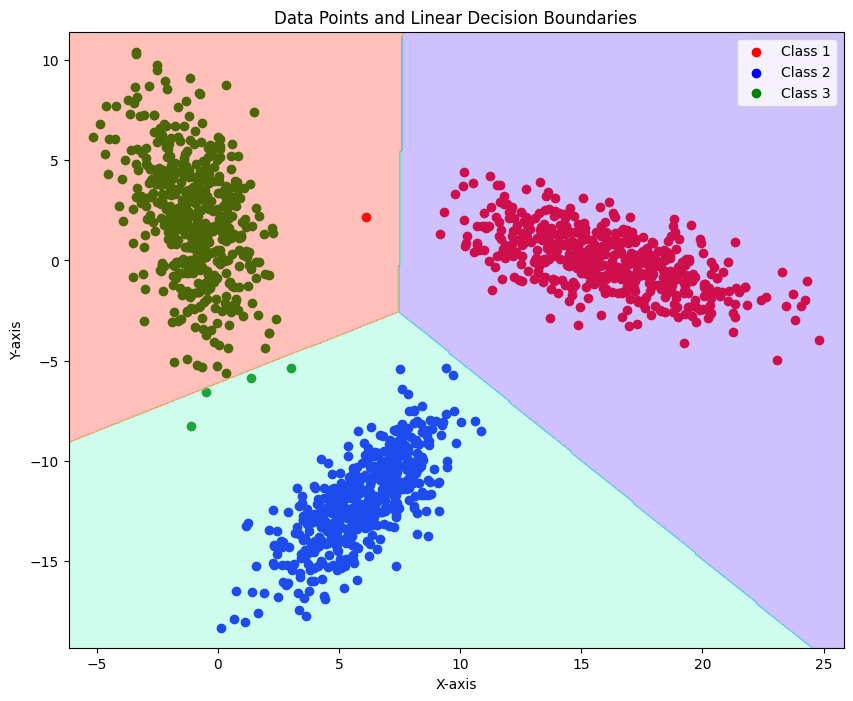

Predictions for Class1.txt: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Helper function to load data from a text file
def load_data(file_path):
    data = np.loadtxt(file_path, delimiter=' ')
    return data[:, 0], data[:, 1]

# Custom function to calculate the mean of a dataset
def calculate_mean(X):
    return np.sum(X, axis=0) / X.shape[0]

# Custom function to calculate the covariance matrix of a dataset
def calculate_covariance(X, mean):
    n_samples = X.shape[0]
    covariance = np.zeros((X.shape[1], X.shape[1]))
    for i in range(n_samples):
        diff = X[i] - mean
        covariance += np.outer(diff, diff)
    return covariance / (n_samples - 1)

# Load datasets from text files
x1, y1 = load_data('Class1.txt')
x2, y2 = load_data('Class2.txt')
x3, y3 = load_data('Class3.txt')

# Combine datasets into features
X_class1 = np.column_stack((x1, y1))
X_class2 = np.column_stack((x2, y2))
X_class3 = np.column_stack((x3, y3))

# Calculate the mean and covariance for each class
mean_class1 = calculate_mean(X_class1)
mean_class2 = calculate_mean(X_class2)
mean_class3 = calculate_mean(X_class3)

# Calculate the shared covariance matrix (assuming equal covariance for LDA)
covariance_class1 = calculate_covariance(X_class1, mean_class1)
covariance_class2 = calculate_covariance(X_class2, mean_class2)
covariance_class3 = calculate_covariance(X_class3, mean_class3)
shared_covariance = (covariance_class1 + covariance_class2 + covariance_class3) / 3

# Calculate the linear discriminant coefficients for each pair of classes (w and b)
covariance_inv = np.linalg.inv(shared_covariance)

w12 = covariance_inv @ (mean_class1 - mean_class2)
b12 = -0.5 * (mean_class1 @ covariance_inv @ mean_class1.T - mean_class2 @ covariance_inv @ mean_class2.T)

w13 = covariance_inv @ (mean_class1 - mean_class3)
b13 = -0.5 * (mean_class1 @ covariance_inv @ mean_class1.T - mean_class3 @ covariance_inv @ mean_class3.T)

w23 = covariance_inv @ (mean_class2 - mean_class3)
b23 = -0.5 * (mean_class2 @ covariance_inv @ mean_class2.T - mean_class3 @ covariance_inv @ mean_class3.T)

# Function to predict class based on the decision boundaries
def predict_class(X, w12, b12, w13, b13, w23, b23):
    decision_12 = X @ w12 + b12
    decision_13 = X @ w13 + b13
    decision_23 = X @ w23 + b23

    predictions = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        votes = [0, 0, 0]
        if decision_12[i] > 0:
            votes[0] += 1
        else:
            votes[1] += 1

        if decision_13[i] > 0:
            votes[0] += 1
        else:
            votes[2] += 1

        if decision_23[i] > 0:
            votes[1] += 1
        else:
            votes[2] += 1

        predictions[i] = np.argmax(votes) + 1  # +1 to get class labels as 1, 2, 3

    return predictions

# Plot data points and decision boundaries
def plot_data_and_boundaries(X_class1, X_class2, X_class3, w12, b12, w13, b13, w23, b23):
    plt.figure(figsize=(10, 8))

    plt.scatter(X_class1[:, 0], X_class1[:, 1], color='red', label='Class 1')
    plt.scatter(X_class2[:, 0], X_class2[:, 1], color='blue', label='Class 2')
    plt.scatter(X_class3[:, 0], X_class3[:, 1], color='green', label='Class 3')

    # Generate a grid of points to evaluate the decision boundaries
    x_min, x_max = min(np.min(X_class1[:, 0]), np.min(X_class2[:, 0]), np.min(X_class3[:, 0])) - 1, max(np.max(X_class1[:, 0]), np.max(X_class2[:, 0]), np.max(X_class3[:, 0])) + 1
    y_min, y_max = min(np.min(X_class1[:, 1]), np.min(X_class2[:, 1]), np.min(X_class3[:, 1])) - 1, max(np.max(X_class1[:, 1]), np.max(X_class2[:, 1]), np.max(X_class3[:, 1])) + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

    # Predict class for each point in the grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_predictions = predict_class(grid_points, w12, b12, w13, b13, w23, b23).reshape(xx.shape)

    # Plot decision boundaries
    plt.contourf(xx, yy, grid_predictions, alpha=0.3, cmap=plt.cm.rainbow)

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.title('Data Points and Linear Decision Boundaries')
    plt.show()

# Plot the datasets and decision boundaries
plot_data_and_boundaries(X_class1, X_class2, X_class3, w12, b12, w13, b13, w23, b23)

# Predict classes for each dataset
predictions_class1 = predict_class(X_class1, w12, b12, w13, b13, w23, b23)
predictions_class2 = predict_class(X_class2, w12, b12, w13, b13, w23, b23)
predictions_class3 = predict_class(X_class3, w12, b12, w13, b13, w23, b23)

print(f"Predictions for Class1.txt: {predictions_class1}")
print(f"Predictions for Class2.txt: {predictions_class2}")
print(f"Predictions for Class3.txt: {predictions_class3}")